<a href="https://www.kaggle.com/code/carloeduardo/cifar-10-image-ckassification-with-cnn?scriptVersionId=128842793" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<center><h1> Image classification with CNN </h1></center> 

<b> Introducction </b>

I have created a convolutional neural network (CNN) for image classification on the CIFAR-10 dataset. I used the Tensorflow and Kera libraries to build the model and used a kaggle GPU for training.

<b> The CIFAR-10 dataset</b>

<p>The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.</p>

<p>The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.</p>

<p> Here are the classes in the data set</p>

<ul>
    <li>airplane</li>
    <li>automibile</li>
    <li>bird</li>
    <li>cat</li>
    <li>deer</li>
    <li>dog</li>
    <li>frog</li>
    <li>horse</li>
    <li>ship</li>
    <li>truck</li>
</ul>

<p> You can see more about this dataset <a HREF = "https://www.cs.toronto.edu/~kriz/cifar.html"> HERE.</a>

<b> Objective</b>
    
The goal is to achieve an accuracy of just over 75%. 

In [1]:
## Libraries 

import numpy as np

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPooling2D
from keras.models import Sequential

import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
## Laoding dataset 

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
## Checking loaded cata 

print("Training dataset: {}\
        \nTesting dataset: {}".format(x_train.shape, x_test.shape))

Training dataset: (50000, 32, 32, 3)        
Testing dataset: (10000, 32, 32, 3)


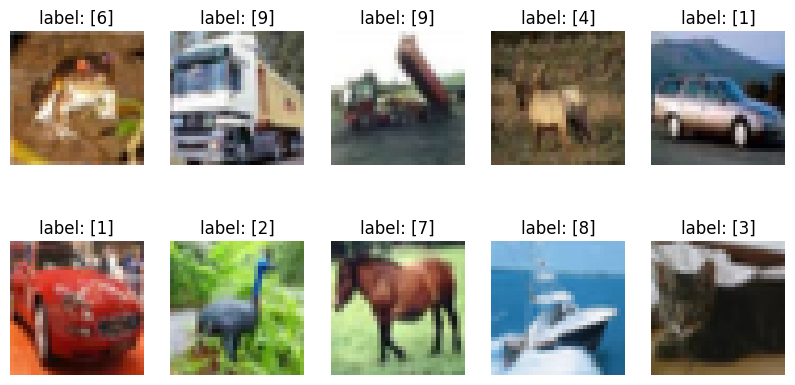

In [4]:
## Show images

plt.figure(figsize=(10,5))

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.axis('off')
  plt.title('label: '+str(y_train[i]))
  plt.imshow(x_train[i])

In [5]:
## Preprocessing data 

# One hot encoder 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Data Normalization 
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
## Training and validation data division

x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [8]:
## Building the cnn model

model = Sequential()

model.add(Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(128, (3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.8))
model.add(Dense(10, activation = 'softmax'))

In [9]:
## Model Summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 128)       0         
                                                        

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train1,y_train1, epochs=30, batch_size=128, validation_data=(x_val,y_val))

Epoch 1/30


2023-05-09 04:29:04.275849: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 20s 35ms/step - loss: 1.8989 - accuracy: 0.2912 - val_loss: 1.4374 - val_accuracy: 0.4670
Epoch 2/30
313/313 [==============================] - 10s 33ms/step - loss: 1.4599 - accuracy: 0.4637 - val_loss: 1.2254 - val_accuracy: 0.5544
Epoch 3/30
313/313 [==============================] - 10s 33ms/step - loss: 1.2693 - accuracy: 0.5421 - val_loss: 1.0505 - val_accuracy: 0.6181
Epoch 4/30
313/313 [==============================] - 10s 33ms/step - loss: 1.1374 - accuracy: 0.5955 - val_loss: 0.9578 - val_accuracy: 0.6552
Epoch 5/30
313/313 [==============================] - 10s 31ms/step - loss: 1.0180 - accuracy: 0.6434 - val_loss: 0.8856 - val_accuracy: 0.6800
Epoch 6/30
313/313 [==============================] - 10s 31ms/step - loss: 0.9562 - accuracy: 0.6640 - val_loss: 0.7851 - val_accuracy: 0.7163
Epoch 7/30
313/313 [==============================] - 10s 34ms/step - loss: 0.8826 - accuracy: 0.6884 - val_loss: 0.7478 - val_accuracy: 0.7375
Epo

In [12]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5942 - accuracy: 0.8135


[0.5941661596298218, 0.8134999871253967]

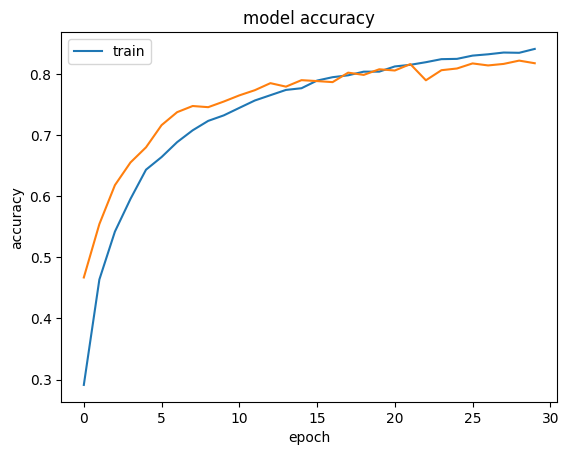

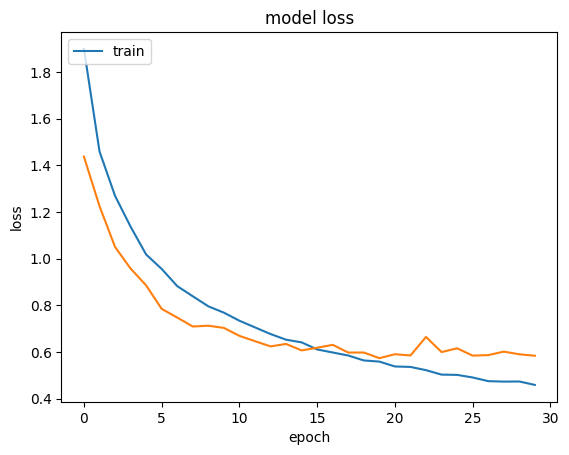

In [13]:
# Graficas de accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# Graficas de loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 20ms/step


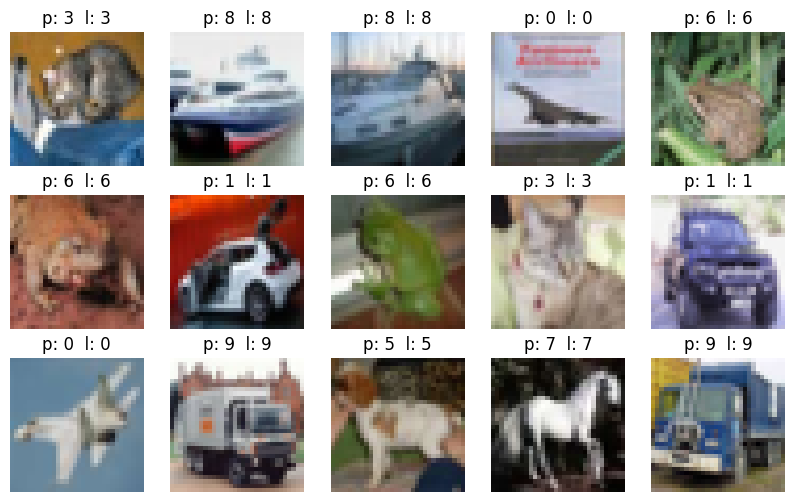

In [14]:
## Test model 

plt.figure(figsize=(10,6))

for i in range(15):
  plt.subplot(3,5,i+1)
  plt.axis('off')
  plt.title('p: '+str(model.predict(np.expand_dims(x_test[i],0)).argmax())+'  l: '+str(y_test[i].argmax()))
  plt.imshow(x_test[i])